# Proyek Analisis Data: [Bike Sharing Public Dataset]
- **Nama:** Arvin Aryasatya
- **Email:** a7aryasatya@gmail.com
- **ID Dicoding:** veentzy

## Menentukan Pertanyaan Bisnis

###### Tren Waktu:

1. Bagaimana tren penggunaan sepeda berubah sepanjang tahun?
2. Apakah ada pola penggunaan yang berbeda antara hari kerja dan akhir pekan?

###### Pengaruh Kondisi Cuaca:

1. Bagaimana suhu (temp dan atemp) mempengaruhi jumlah pengguna sepeda?
2. Apakah ada korelasi antara kelembapan (hum) atau kecepatan angin (windspeed) dengan jumlah pengguna sepeda?

###### Pengguna Terdaftar vs Tidak Terdaftar:

1. Bagaimana perbandingan pola penggunaan antara pengguna terdaftar (registered) dan pengguna tidak terdaftar (casual)?
2. Apakah pengguna terdaftar lebih cenderung menggunakan sepeda secara konsisten dibandingkan dengan pengguna tidak terdaftar?

###### Pengaruh Faktor Eksternal:

1. Apakah hari libur memiliki dampak signifikan terhadap jumlah penggunaan sepeda?
2. Bagaimana kondisi cuaca (weathersit) mempengaruhi preferensi pengguna dalam memilih menggunakan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
folder_path = 'Bike/'

df = pd.read_csv(folder_path + 'day.csv')

In [3]:
df.rename(columns = {
    'instant': 'Instant',
    'dteday': 'Date_Day',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr' : 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working_Day',
    'weathersit': 'Weather_Situation',
    'temp': 'Temperature',
    'atemp': 'Apparent_Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind_Speed',
    'casual': 'Casual_Users',
    'registered': 'Registered_Users',
    'cnt': 'Total_Count'
}, inplace=True)

In [4]:
df.head()

,Instant,Date_Day,Season,Year,Month,Holiday,Weekday,Working_Day,Weather_Situation,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instant               731 non-null    int64  
 1   Date_Day              731 non-null    object 
 2   Season                731 non-null    int64  
 3   Year                  731 non-null    int64  
 4   Month                 731 non-null    int64  
 5   Holiday               731 non-null    int64  
 6   Weekday               731 non-null    int64  
 7   Working_Day           731 non-null    int64  
 8   Weather_Situation     731 non-null    int64  
 9   Temperature           731 non-null    float64
 10  Apparent_Temperature  731 non-null    float64
 11  Humidity              731 non-null    float64
 12  Wind_Speed            731 non-null    float64
 13  Casual_Users          731 non-null    int64  
 14  Registered_Users      731 non-null    int64  
 15  Total_Count           7

In [6]:
df.isna().sum()

Instant                 0
Date_Day                0
Season                  0
Year                    0
Month                   0
Holiday                 0
Weekday                 0
Working_Day             0
Weather_Situation       0
Temperature             0
Apparent_Temperature    0
Humidity                0
Wind_Speed              0
Casual_Users            0
Registered_Users        0
Total_Count             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Instant                 731
Date_Day                731
Season                    4
Year                      2
Month                    12
Holiday                   2
Weekday                   7
Working_Day               2
Weather_Situation         3
Temperature             499
Apparent_Temperature    690
Humidity                595
Wind_Speed              650
Casual_Users            606
Registered_Users        679
Total_Count             696
dtype: int64

In [9]:
df.describe()

,Instant,Season,Year,Month,Holiday,Weekday,Working_Day,Weather_Situation,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning

#### Day

In [10]:
df['Date_Day'] = pd.to_datetime(df['Date_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Instant               731 non-null    int64         
 1   Date_Day              731 non-null    datetime64[ns]
 2   Season                731 non-null    int64         
 3   Year                  731 non-null    int64         
 4   Month                 731 non-null    int64         
 5   Holiday               731 non-null    int64         
 6   Weekday               731 non-null    int64         
 7   Working_Day           731 non-null    int64         
 8   Weather_Situation     731 non-null    int64         
 9   Temperature           731 non-null    float64       
 10  Apparent_Temperature  731 non-null    float64       
 11  Humidity              731 non-null    float64       
 12  Wind_Speed            731 non-null    float64       
 13  Casual_Users        

## Exploratory Data Analysis (EDA)

In [11]:
yearly_usage = df.groupby('Year')['Total_Count'].sum().reset_index()
yearly_usage['Year'] = yearly_usage['Year'].map({0: '2011', 1: '2012'})

In [12]:
yearly_usage

,Year,Total_Count
0,2011,1243103
1,2012,2049576


In [13]:
usage_by_workingday = df.groupby('Working_Day')['Total_Count'].mean().reset_index()
usage_by_workingday['Day_Type'] = usage_by_workingday['Working_Day'].map({0: 'Weekend/Holiday', 1: 'Weekday'})

In [14]:
df['Temperature'] = df['Temperature'] * 41
df['Apparent_Temperature'] = df['Apparent_Temperature'] * 50

In [15]:
df['Humidity'] = df['Humidity'] * 100
df['Wind_Speed'] = df['Wind_Speed'] * 67

In [16]:
average_usage_by_weather = df.groupby('Weather_Situation')['Total_Count'].mean().reset_index()
average_usage_by_weather['Weather_Situation'] = average_usage_by_weather['Weather_Situation'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

In [ ]:
daily_usage = df.groupby('Date_Day')[['Registered_Users', 'Casual_Users']].mean()

### Tren Waktu :

###### Bagaimana tren penggunaan sepeda berubah sepanjang tahun?

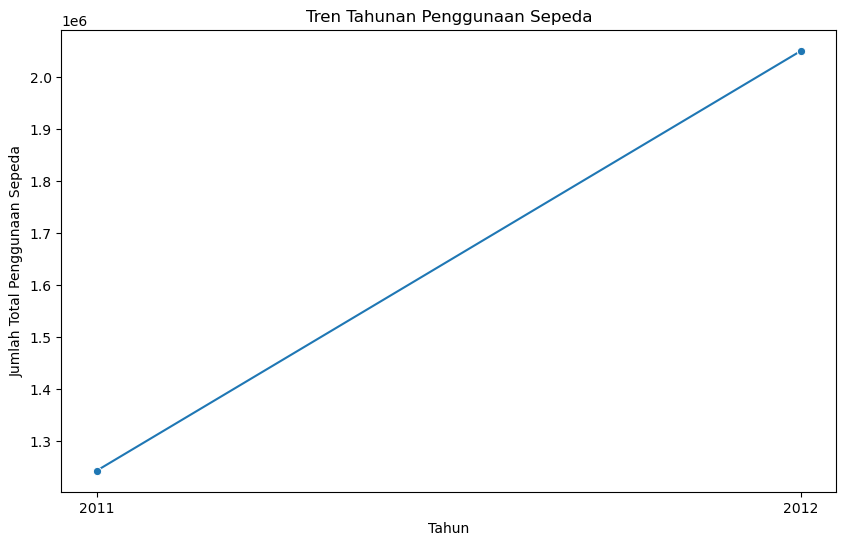

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_usage, x='Year', y='Total_Count', marker='o')
plt.title('Tren Tahunan Penggunaan Sepeda')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Total Penggunaan Sepeda')
plt.xticks(yearly_usage['Year'])
plt.show()

###### Apakah ada pola penggunaan yang berbeda antara hari kerja dan akhir pekan?

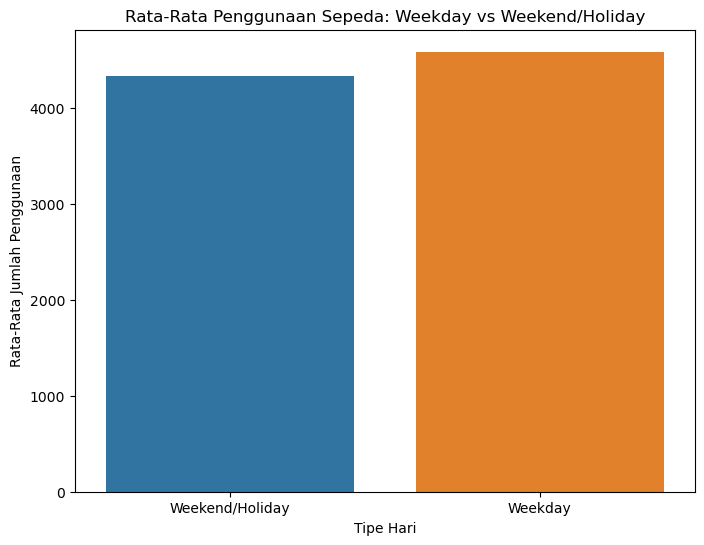

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(data=usage_by_workingday, x='Day_Type', y='Total_Count')
plt.title('Rata-Rata Penggunaan Sepeda: Weekday vs Weekend/Holiday')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Jumlah Penggunaan')
plt.show()

### Pengaruh Kondisi Cuaca:

##### Bagaimana suhu (temp dan atemp) mempengaruhi jumlah pengguna sepeda?

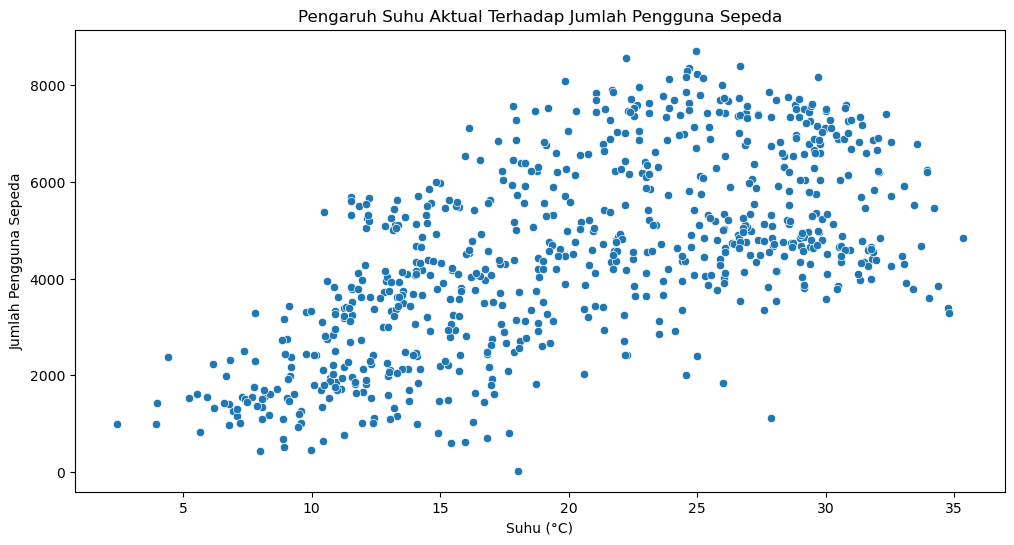

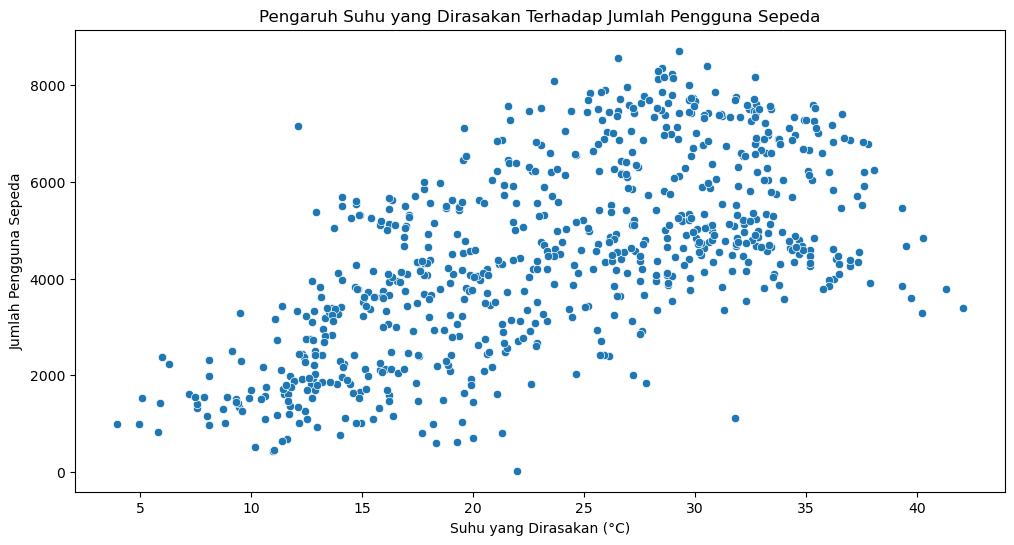

Koefisien korelasi antara suhu aktual dan jumlah pengguna sepeda: 0.627494009033492
Koefisien korelasi antara suhu yang dirasakan dan jumlah pengguna sepeda: 0.6310656998491813


In [19]:
# Scatter plot untuk suhu aktual dan jumlah pengguna sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Total_Count', data=df)
plt.title('Pengaruh Suhu Aktual Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Scatter plot untuk suhu yang dirasakan dan jumlah pengguna sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Apparent_Temperature', y='Total_Count', data=df)
plt.title('Pengaruh Suhu yang Dirasakan Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Suhu yang Dirasakan (°C)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Menghitung koefisien korelasi
correlation_temp = df['Temperature'].corr(df['Total_Count'])
correlation_atemp = df['Apparent_Temperature'].corr(df['Total_Count'])

print(f"Koefisien korelasi antara suhu aktual dan jumlah pengguna sepeda: {correlation_temp}")
print(f"Koefisien korelasi antara suhu yang dirasakan dan jumlah pengguna sepeda: {correlation_atemp}")

##### Apakah ada korelasi antara kelembapan (hum) atau kecepatan angin (windspeed) dengan jumlah pengguna sepeda?

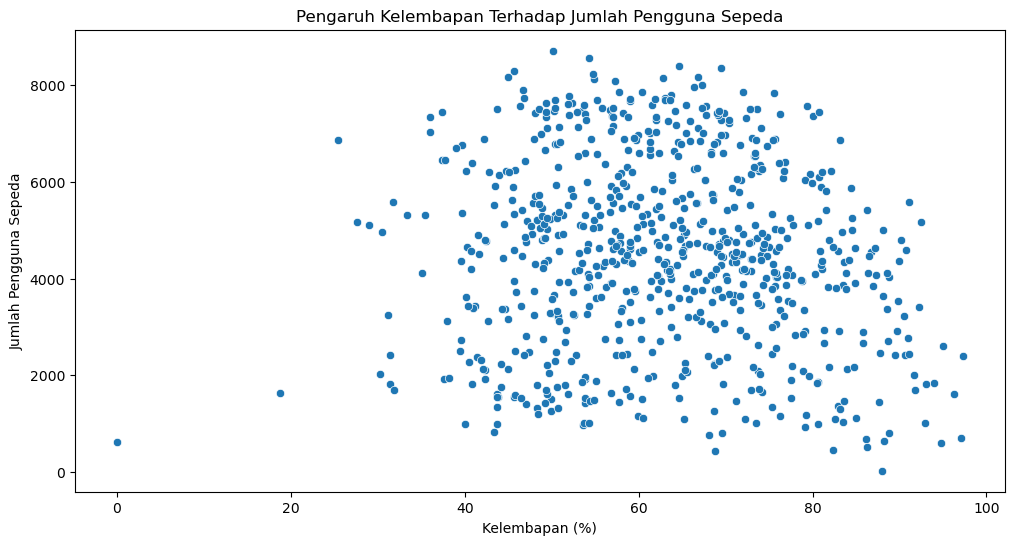

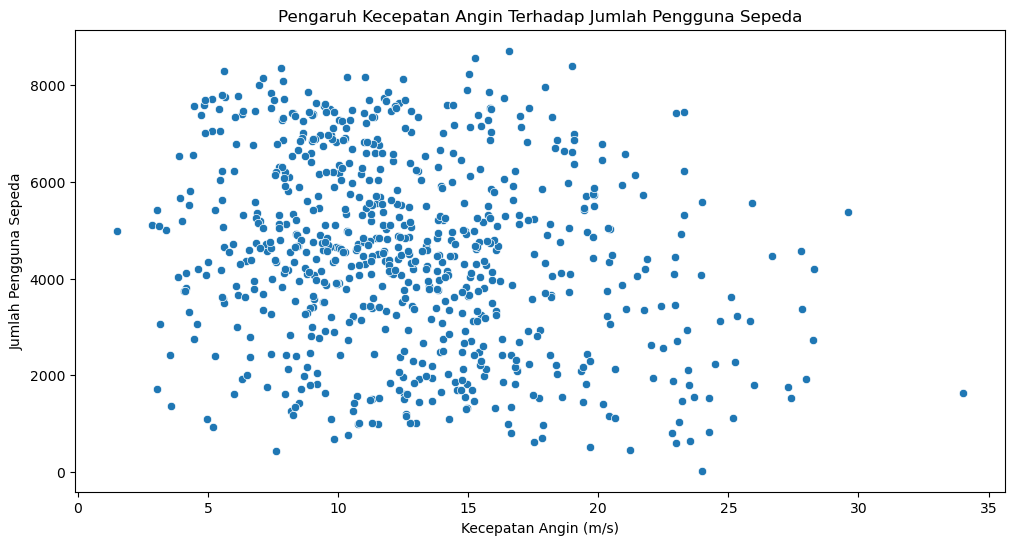

Koefisien korelasi antara kelembapan dan jumlah pengguna sepeda: -0.1006585621371553
Koefisien korelasi antara kecepatan angin dan jumlah pengguna sepeda: -0.2345449974216701


In [20]:
# Scatter plot untuk kelembapan dan jumlah pengguna sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Humidity', y='Total_Count', data=df)
plt.title('Pengaruh Kelembapan Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Scatter plot untuk kecepatan angin dan jumlah pengguna sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Wind_Speed', y='Total_Count', data=df)
plt.title('Pengaruh Kecepatan Angin Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Menghitung koefisien korelasi
correlation_humidity = df['Humidity'].corr(df['Total_Count'])
correlation_windspeed = df['Wind_Speed'].corr(df['Total_Count'])

print(f"Koefisien korelasi antara kelembapan dan jumlah pengguna sepeda: {correlation_humidity}")
print(f"Koefisien korelasi antara kecepatan angin dan jumlah pengguna sepeda: {correlation_windspeed}")

### Pengguna Terdaftar vs Tidak Terdaftar:

##### Bagaimana perbandingan pola penggunaan antara pengguna terdaftar (registered) dan pengguna tidak terdaftar (casual)?

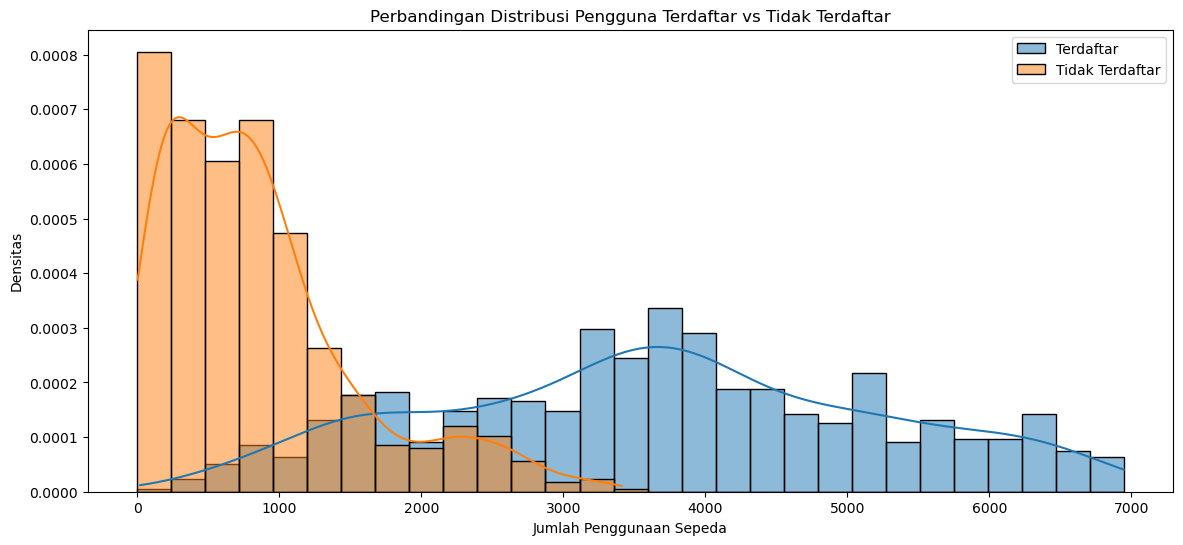


Statistik Deskriptif Pengguna Terdaftar:
Max : 6946
Min : 20
Total : 2672662


Statistik Deskriptif Pengguna Tidak Terdaftar:
Max : 3410
Min : 2
Total : 620017


In [21]:
plt.figure(figsize=(14, 6))

bins = np.linspace(0, max(df['Registered_Users'].max(), df['Casual_Users'].max()), 30)

sns.histplot(df['Registered_Users'], bins=bins, kde=True, stat='density', common_norm=True, label='Terdaftar')
sns.histplot(df['Casual_Users'], bins=bins, kde=True, stat='density', common_norm=True, label='Tidak Terdaftar')

plt.xlabel('Jumlah Penggunaan Sepeda')
plt.ylabel('Densitas')
plt.title('Perbandingan Distribusi Pengguna Terdaftar vs Tidak Terdaftar')
plt.legend()
plt.show()

print("\nStatistik Deskriptif Pengguna Terdaftar:")
print("Max :", df['Registered_Users'].max())
print("Min :", df['Registered_Users'].min())
print("Total :", df['Registered_Users'].sum())
print("\n")
print("Statistik Deskriptif Pengguna Tidak Terdaftar:")
print("Max :", df['Casual_Users'].max())
print("Min :", df['Casual_Users'].min())
print("Total :", df['Casual_Users'].sum())

##### Apakah pengguna terdaftar lebih cenderung menggunakan sepeda secara konsisten dibandingkan dengan pengguna tidak terdaftar?

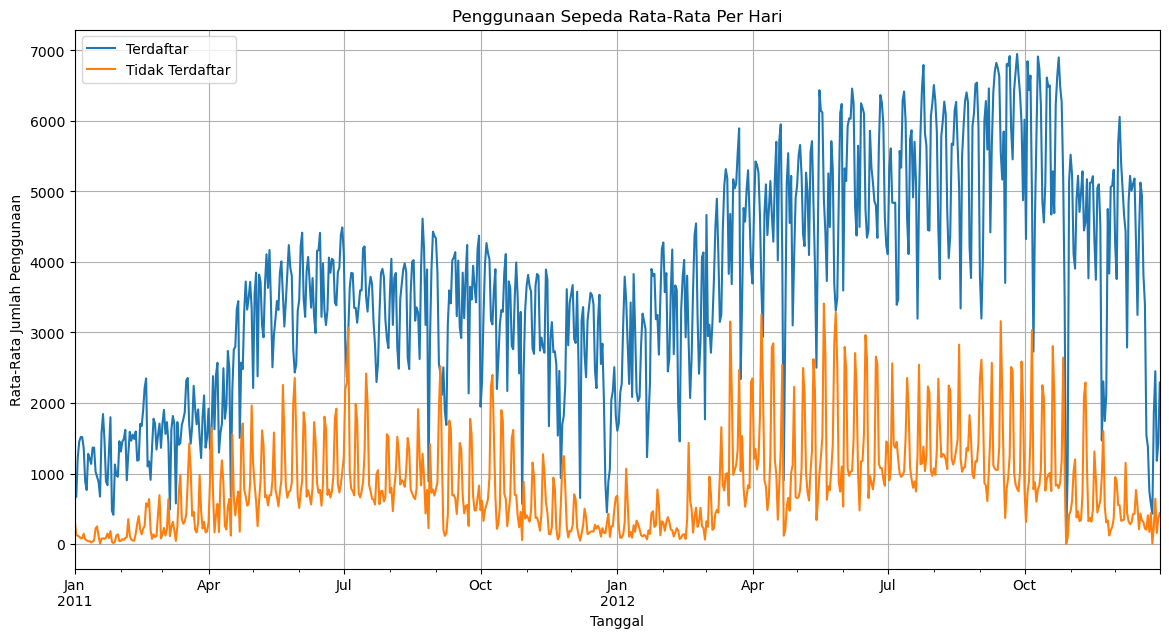

In [22]:
daily_usage.plot(figsize=(14, 7))
plt.title('Penggunaan Sepeda Rata-Rata Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Jumlah Penggunaan')
plt.legend(['Terdaftar', 'Tidak Terdaftar'])
plt.grid(True)
plt.show()

### Pengaruh Faktor Eksternal:

##### Apakah hari libur memiliki dampak signifikan terhadap jumlah penggunaan sepeda?

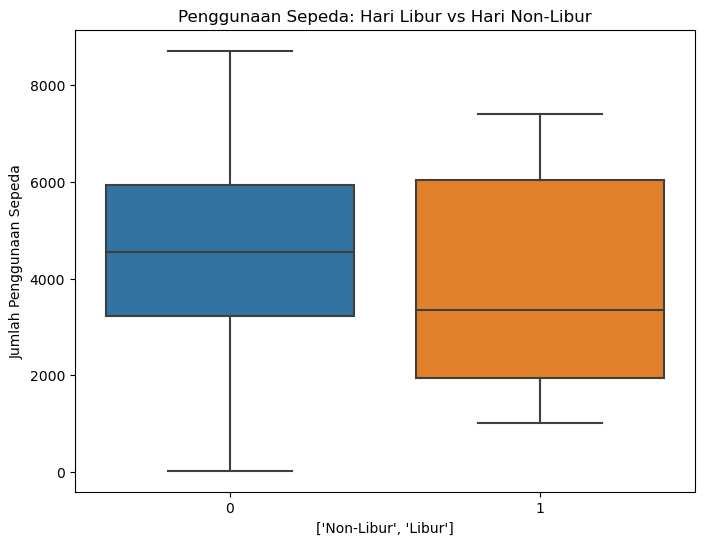

Rata-rata penggunaan sepeda pada hari libur: 3735.00
Rata-rata penggunaan sepeda pada hari non-libur: 4527.10


In [23]:
# Visualisasi perbedaan penggunaan sepeda
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday', y='Total_Count', data=df)
plt.title('Penggunaan Sepeda: Hari Libur vs Hari Non-Libur')
plt.xlabel(['Non-Libur', 'Libur'])
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

average_holiday_usage = df[df['Holiday'] == 1]['Total_Count'].mean()
average_nonholiday_usage = df[df['Holiday'] == 0]['Total_Count'].mean()

print(f"Rata-rata penggunaan sepeda pada hari libur: {average_holiday_usage:.2f}")
print(f"Rata-rata penggunaan sepeda pada hari non-libur: {average_nonholiday_usage:.2f}")

##### Bagaimana kondisi cuaca (weathersit) mempengaruhi preferensi pengguna dalam memilih menggunakan sepeda?

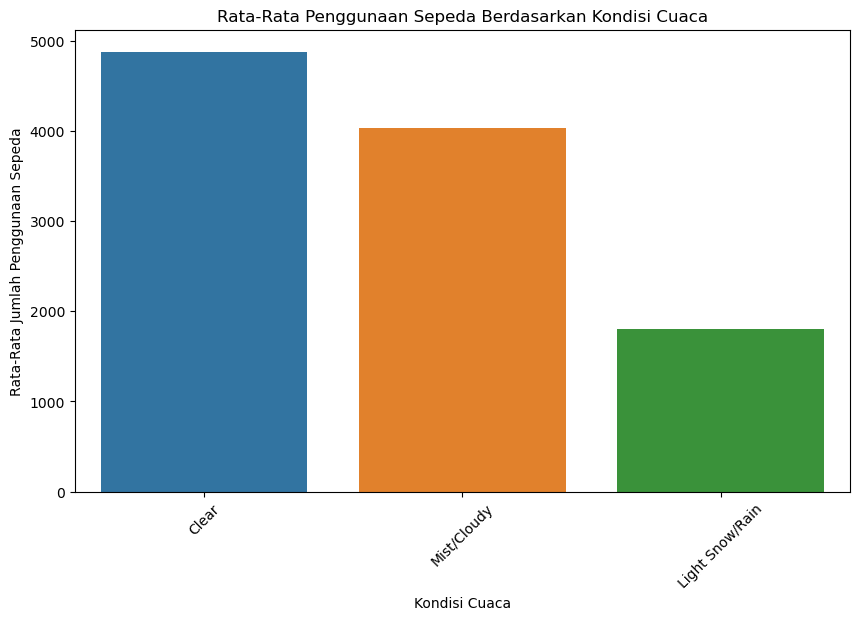

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Situation', y='Total_Count', data=average_usage_by_weather)
plt.title('Rata-Rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.show()

## Conclusion

### Tren Waktu :

- Penggunaan sepeda naik dari tahun 2011 ke 2012, menunjukkan orang semakin sering bersepeda.
- Orang lebih banyak menggunakan sepeda untuk kegiatan sehari-hari saat hari kerja, sementara di akhir pekan penggunaannya berkurang.

### Kondisi Cuaca :

- Suhu yang lebih tinggi meningkatkan penggunaan sepeda, dengan korelasi yang lebih kuat untuk suhu yang dirasakan daripada suhu aktual.
- Kelembapan dan kecepatan angin yang lebih tinggi cenderung sedikit mengurangi penggunaan sepeda, namun pengaruhnya tidak sekuat suhu.

### Pengguna Terdaftar vs Tidak Terdaftar:

- Pengguna terdaftar bersepeda lebih sering dan konsisten daripada pengguna tidak terdaftar, yang penggunaannya lebih acak dan dalam jumlah lebih kecil.
- Pengguna terdaftar bersepeda secara rutin setiap hari, sementara pengguna tidak terdaftar lebih sering bersepeda secara tidak teratur, terutama saat cuaca baik atau di akhir pekan.

### Pengaruh Faktor Eksternal:
- Penggunaan sepeda lebih tinggi pada hari kerja dibanding hari libur, menandakan sepeda banyak dipakai untuk kegiatan rutin seperti bekerja dan sekolah.
- Cuaca cerah meningkatkan penggunaan sepeda, sementara kabut, mendung, atau hujan cenderung menurunkan frekuensi bersepeda.